In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm


In [12]:
train = pd.read_csv("loan-train.csv", header=0)
test= pd.read_csv("loan-test.csv",header=0)
print(train)
print(test)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [19]:
train_df=train.copy()
test_df = test.copy()
train_df.head()
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [20]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [23]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)  
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True) 
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True) 
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True) 
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
train_df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
train_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'No of Gender')

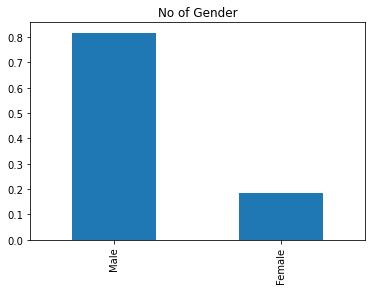

In [38]:
train_df['Gender'].value_counts(normalize =True).plot.bar()
plt.title("No of Gender")

Text(0.5, 1.0, 'Martial Status')

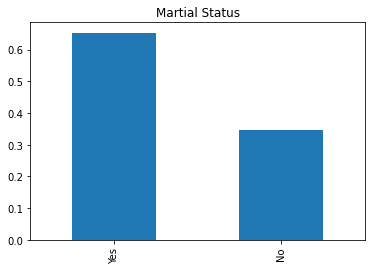

In [39]:
train_df['Married'].value_counts(normalize =True).plot.bar()
plt.title("Martial Status")

Text(0.5, 1.0, 'No. of Dependents')

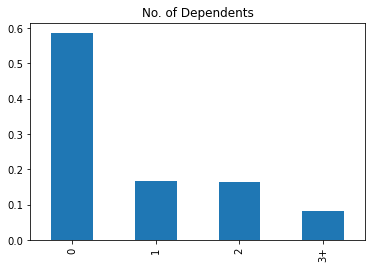

In [41]:
train_df['Dependents'].value_counts(normalize =True).plot.bar()
plt.title("No. of Dependents")

Text(0.5, 1.0, 'Status of Self Employed')

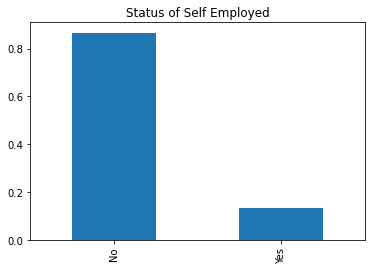

In [43]:
train_df['Self_Employed'].value_counts(normalize =True).plot.bar()
plt.title("Status of Self Employed")

Text(0.5, 1.0, 'Status of Credit History')

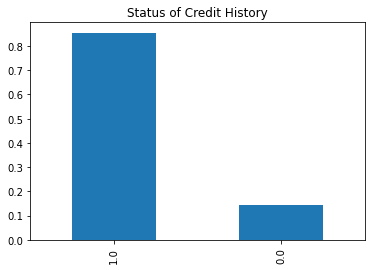

In [44]:
train_df['Credit_History'].value_counts(normalize =True).plot.bar()
plt.title("Status of Credit History")

Text(0.5, 1.0, 'status of property area')

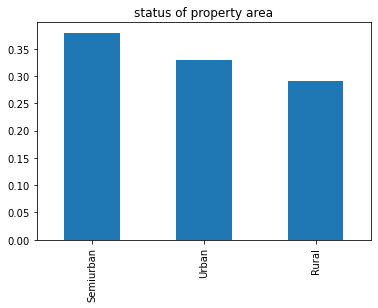

In [45]:
train_df['Property_Area'].value_counts(normalize =True).plot.bar()
plt.title("status of property area")

C:\Users\moina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


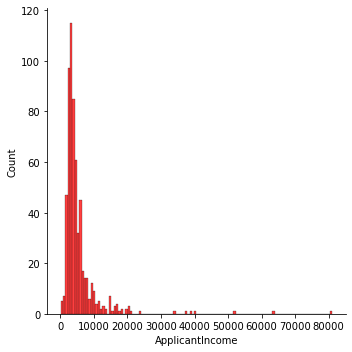

In [56]:

sns.displot(train_df['ApplicantIncome'],color='r')
plt.show()

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

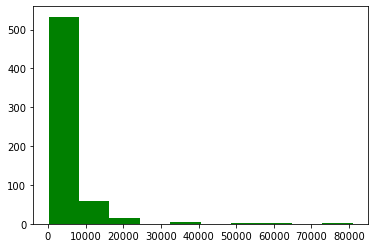

In [66]:
plt.hist(train_df['ApplicantIncome'],color='g')

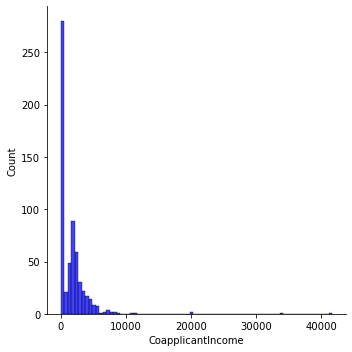

In [68]:
sns.displot(train_df['CoapplicantIncome'],color='b')

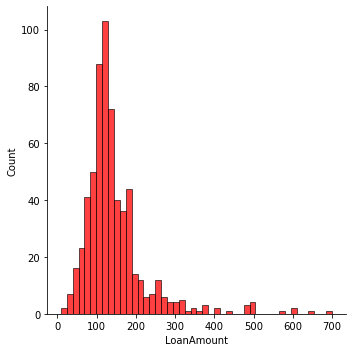

In [69]:
sns.displot(train_df['LoanAmount'],color='r')

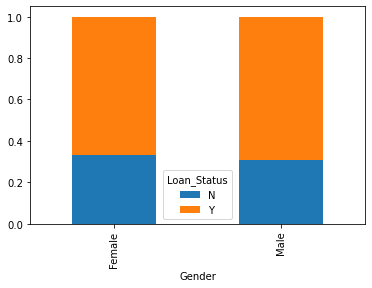

In [77]:
Gender =pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


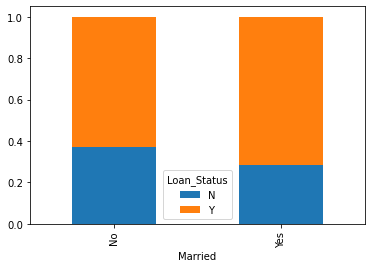

In [78]:
Married =pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

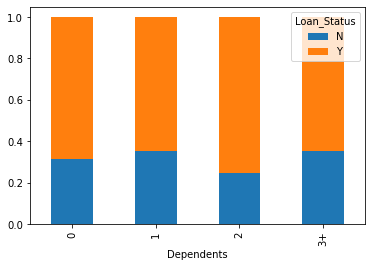

In [79]:
Dependents =pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

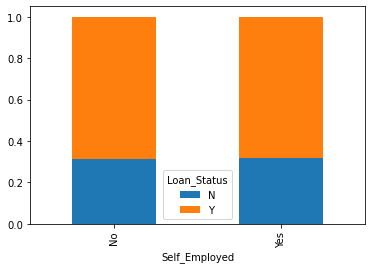

In [80]:
Self_Employed =pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

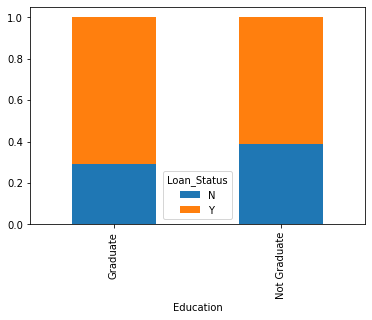

In [82]:
Education =pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

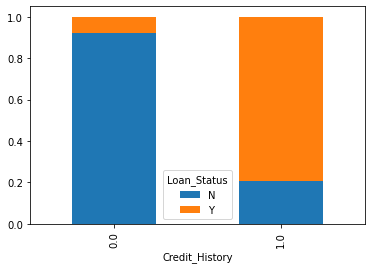

In [83]:
Credit_History =pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()